### Домашнє завдання: Пониження розмірностей для Аналізу Портретів Клієнтів

#### Контекст
В цьому ДЗ ми попрацюємо з методами пониження розмірності на наборі даних для задачі аналізу портретів клієнтів (Customer Personality Analysis). **В попередньому ДЗ ми працювали з цими даними використовуючи кластеризацію, зараз використаємо кластеризацію і візуалізауємо результати з різними методами.**

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


Для початку, запустіть код нижче. Всі ці кроки ми робили в попередньому ДЗ і для того, щоб результати кластеризації у нас були схожими, потрібно аби передобробка була однаковою.

In [8]:
import pandas as pd

# 1. Завантаження даних
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1-PG9bDtcSq9TI9rI9QbNrvZoO3AsG-gofaKGo42Th6A/gviz/tq?tqx=out:csv&sheet=Sheet1")

# 2. Обробка пропущених значень
df['Income_not_filled'] = df['Income'].isna()
df['Income'] = df['Income'].fillna(-1)

# 3. Обробка дати реєстрації
df.Dt_Customer = pd.to_datetime(df.Dt_Customer, format='%d-%m-%Y')
today = df.Dt_Customer.max()
df['days_lifetime'] = (today - df.Dt_Customer).dt.days
df['years_customer'] = df.Year_Birth.apply(lambda x: today.year - x)

# 4. Категоризація рівня освіти
df_education = pd.get_dummies(df.Education, prefix='education').astype(int)
df = pd.concat([df, df_education], axis=1)

# 5. Очищення сімейного стану
marital_status_map = {'Alone': 'Single', 'Absurd': 'Else', 'YOLO': 'Else'}
df['Marital_Status_clean'] = df.Marital_Status.map(marital_status_map)
df_ms = pd.get_dummies(df.Marital_Status_clean, prefix='marital').astype(int)
df = pd.concat([df, df_ms], axis=1)

# 6. Форматування доходу і видалення викиду
df.Income = df.Income.astype(int)
df = df[df.Income != 666666]

# 7. Створення фінального набору даних
X = df.drop(['ID', 'Dt_Customer', 'Education', 'Marital_Status', 'Marital_Status_clean'], axis=1)
X.reset_index(drop=True, inplace=True)

### Завдання 1: Виконання кластеризації та пониження розмірності для візуалізації результатів

Ваше завдання — провести кластеризацію клієнтів та візуалізувати результати кластеризації, використовуючи метод головних компонент (PCA) для пониження розмірності даних.

#### Інструкції:

1. **Вибір ключових характеристик:**
   Давайте обмежимось тільки наступними хараткеристиками для кластеризації цього разу:
   - `Income`: Річний дохід домогосподарства клієнта
   - `Recency`: Кількість днів з моменту останньої покупки клієнта
   - `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
   - `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
   - `days_lifetime`: Кількість днів з моменту реєстрації клієнта у компанії
   - `years_customer`: Вік клієнта
   - `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць
   Відберіть в наборі даних `X` лише ці характеристики.

2. **Стандартизація даних:**
   Використайте метод `StandardScaler` для стандартизації значень обраних характеристик.
   
   **Чому не MinMaxScaler:**
   - Для PCA краще використовувати StandardScaler, бо він вирівнює дисперсію ознак, на відміну від MinMaxScaler, що просто масштабує значення без врахування варіації.

   - Для K-Means також краще використовувати StandardScaler, бо алгоритм чутливий до масштабів: фічі з більшими значеннями сильніше впливають на обчислення відстаней, що може спотворити кластери.

3. **Кластеризація:**
   Проведіть кластеризацію клієнтів, використовуючи метод `KMeans` з трьома кластерами.

4. **Пониження розмірності:**
   Використайте метод головних компонент (PCA) для пониження розмірності даних до трьох компонент.

5. **Візуалізація результатів:**
   Використовуючи plolty express побудуйте 3D-графік розподілу клієнтів у просторі трьох головних компонент, де кольором позначено кластери.

6. **Опишіть, що спостерігаєте:**
   Чи кластеризація чітко розділила дані?

Далі ми детальніше проінтерпретуємо результати візуалізації і пониження розмірностей.

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
features = [
    'Income',
    'Recency',
    'NumStorePurchases',
    'NumDealsPurchases',
    'days_lifetime',
    'years_customer',
    'NumWebVisitsMonth'
]

In [46]:
def scale_data(X, features):
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X[features]), columns=features)
    return X_scaled, scaler

def apply_pca(X_scaled, n_components=3):
    pca = PCA(n_components=n_components, random_state=42)
    X_pca = pd.DataFrame(pca.fit_transform(X_scaled), columns=[f'PC{i+1}' for i in range(n_components)])
    return X_pca, pca

def plot_pca_clusters(X_pca, clusters):
    fig = px.scatter_3d(
        X_pca, x='PC1', y='PC2', z='PC3',
        color=clusters.astype(str),
        title='3D PCA plot with KMeans clusters',
        labels={'color': 'Cluster'}
    )
    fig.show()

def plot_heatmap(loadings):
    plt.figure(figsize=(8, 6))
    sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
    plt.title('PCA Loadings Heatmap')
    plt.show()


In [47]:
X_scaled, scaler = scale_data(X, features)
km = KMeans(n_clusters=3, n_init='auto', random_state=42)
df['cluster'] = km.fit_predict(X_scaled)


centroids_unscaled = pd.DataFrame(
    scaler.inverse_transform(km.cluster_centers_),
    columns=features
).assign(cluster=range(3))

profile = (
    df.groupby('cluster')[features + ['Income_not_filled']]
      .agg(['mean','median','min','max','count'])
)
profile.head()

Income                               Recency                 \
                 mean   median min     max count       mean median min max   
cluster                                                                      
0        33061.005203  33456.0  -1   70643   961  48.509886   48.0   0  99   
1        72551.554070  72025.0  -1  162397   823  49.345079   50.0   0  99   
2        51937.723077  52750.0  -1  160803   455  50.006593   51.0   0  98   

               ... NumWebVisitsMonth                      Income_not_filled  \
        count  ...              mean median min max count              mean   
cluster        ...                                                            
0         961  ...          6.506764    7.0   0  20   961          0.020812   
1         823  ...          3.066829    3.0   0   8   823          0.001215   
2         455  ...          6.870330    7.0   0  20   455          0.006593   

                                   
        median    min   max count  
cluster                            
0          0.0  False  True   961  
1          0.0  False  True   823  
2          0.0  False  True   455  

[3 rows x 40 columns]

Отже, KMeans поділив дані насамперед за рівнем доходу - низький(0), середній(2) та великий(1)

In [48]:
X_pca, pca = apply_pca(X_scaled, n_components=3)
plot_pca_clusters(X_pca, df['cluster'])

3 групи (кластер 0, 1, 2) чітко забарвлені різними кольорами. Вони розташовані з перекриттям, але мають видимі центри мас, тобто KMeans справді виділив три окремі «зони». Один кластер (світло-блакитний, Cluster 1) трохи зміщений убік — це, швидше за все, група з вищим доходом, бо PCA-компоненти сильно реагують на великі числові відмінності у фічах.

Модель з k=3 дійсно знаходить структуровані сегменти, але кластери не абсолютно відокремлені — тобто дані частково накладаються

### Завдання 2: Аналіз результатів пониження розмірності

1. **Розрахунок частки поясненої дисперсії:**
   Визначте, яка частка загальної варіації даних пояснюється кожною з трьох головних компонент (PC1, PC2, PC3) за допомогою атрибуту `explained_variance_ratio_` об'єкта PCA. Виведіть результат на екран.

2. **Розрахунок кумулятивної частки поясненої дисперсії:**
   Обчисліть кумулятивну частку поясненої дисперсії для трьох головних компонент, щоб зрозуміти, скільки варіації даних пояснюється першими кількома компонентами.

In [33]:
explained_ratio = pca.explained_variance_ratio_
for i, var in enumerate(explained_ratio, start=1):
    print(f"PC{i}: {var:.4f} ({var*100:.2f}%)")

PC1: 0.3185 (31.85%)
PC2: 0.1966 (19.66%)
PC3: 0.1434 (14.34%)


In [34]:
cumulative_explained = np.cumsum(explained_ratio)
print("Кумулятивна частка поясненої дисперсії:", cumulative_explained)
print(f"Разом три компоненти пояснюють {cumulative_explained[-1]*100:.2f}% варіації даних")

Кумулятивна частка поясненої дисперсії: [0.31847333 0.51506461 0.6584515 ]
Разом три компоненти пояснюють 65.85% варіації даних


PC1 пояснює найбільшу частку дисперсії (~32 %) — тобто ця вісь «захоплює» найбільш різноманітну інформацію у даних (скоріш за все, пов’язану з рівнем доходу та Recency).

PC2 додає ще ~20 % — тобто разом із першою компонентою вони вже пояснюють ≈ 51.5 % усієї варіації.

PC3 додає ще ~14 %, і сумарно перші три компоненти пояснюють ≈ 65.8 % варіації даних.

### Завдання 3: Інтерпретація "Loadings"

Продовжуємо інтерпретацію результатів `PCA`і познайомимось з новим поняттям `loadings`, яке допоможе нам знайти звʼязок між головними компонентами і оригінальними ознаками в наборі даних.

Ми зараз побудували візуалізацію кластерів точок даних в просторі трьох головних компонент. Але хочеться знайти звʼязок між головними компонентами і оригінальними ознаками. Для розуміння, які початкові характеристики даних мають найбільший вплив на ці головні компоненти, ми можемо використати атрибут `components_` методу `PCA`.

#### Що таке `pca.components_`?

`pca.components_` — це масив, який містить коефіцієнти (або "ваги"), що показують внесок кожної вихідної ознаки у кожну з головних компонент. Ці коефіцієнти ще називаються **"loading"** або "навантаженнями" компонент.

- **Loadings** (`навантаження`) відображають важливість кожної змінної (ознаки) для відповідної головної компоненти. Вони показують, яким чином змінні поєднуються, щоб утворити нові, зменшені вимірювання.
- Якщо коефіцієнт має високе абсолютне значення (як позитивне, так і негативне), це вказує на те, що відповідна змінна сильно впливає на головну компоненту.

#### Саме завдання
Ваше завдання — обчислити "навантаження" для кожної з головних компонент і інтерпретувати результати.

1. **Обчислення loadings для компонент:**
   Використайте атрибут `components_` об'єкта PCA для створення DataFrame, який відображатиме внесок кожної вихідної ознаки в кожну головну компоненту.

2. **Інтерпретація результатів:**
   Виведіть значення "навантажень" і проаналізуйте, які ознаки найбільше впливають на кожну головну компоненту.

In [50]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=features,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)
loadings

,PC1,PC2,PC3
Income,0.584238,0.165255,-0.044491
Recency,0.010075,0.036810,0.975799
NumStorePurchases,0.488621,0.384659,-0.080566
NumDealsPurchases,-0.198661,0.608119,-0.034808
days_lifetime,-0.132683,0.602585,-0.022223
years_customer,0.189393,0.208946,0.193368
NumWebVisitsMonth,-0.571728,0.216329,-0.015815


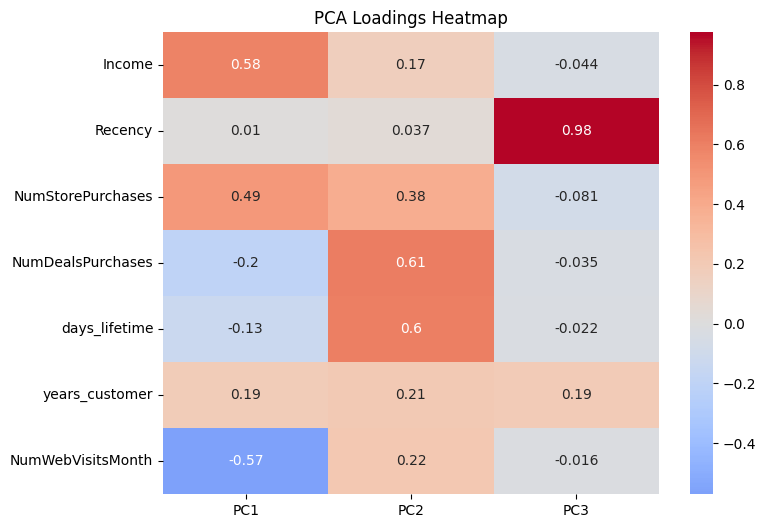

In [53]:
plot_heatmap(loadings)

Компонента PC1 описує клієнтів із вищим доходом і більшою кількістю офлайн-покупок, але менш активних онлайн.

PC2 - показує лояльних і довгострокових клієнтів, які активно користуються знижками і пропозиціями.

PC3 - повністю описується показником Recency, тобто часом останньої покупки.

Таким чином, PCA дозволила виділити три ключові осі поведінки клієнтів: фінансова спроможність, лояльність/довгостроковість, та поточна активність.

### Завдання 4
Давайте проаналізуємо "навантаження" (**loadings**) для трьох головних компонент після вилучення ознаки `Income`. Це допоможе нам зрозуміти, як змінилася важливість інших ознак для кожної головної компоненти, коли одна з ключових характеристик (`Income`) була вилучена.

#### Кроки для проведення аналізу і ваше завдання:

1. Видаліть ознаку `Income` з нашого набору даних `X` і повторно виконайте PCA (метод головних компонент) для отримання нових "навантажень".

2. Обчисліть нові "навантаження" для трьох головних компонент на наборі даних без `Income`

3. Проаналізуйте, які ознаки мають найбільший вплив на кожну головну компоненту після вилучення `Income`.

4. Перегляньте, наскільки кожна з головних компонент пояснює дисперсію в даних без ознаки `Income`.

In [54]:
features_without_income = [
    'Recency',
    'NumStorePurchases',
    'NumDealsPurchases',
    'days_lifetime',
    'years_customer',
    'NumWebVisitsMonth'
]

,PC1,PC2,PC3
Recency,-0.014416,0.074880,0.990219
NumStorePurchases,-0.381237,0.629202,-0.111063
NumDealsPurchases,0.445591,0.461539,-0.061793
days_lifetime,0.383782,0.467914,0.006776
years_customer,-0.177270,0.393576,0.056285
NumWebVisitsMonth,0.690787,-0.107863,0.009910


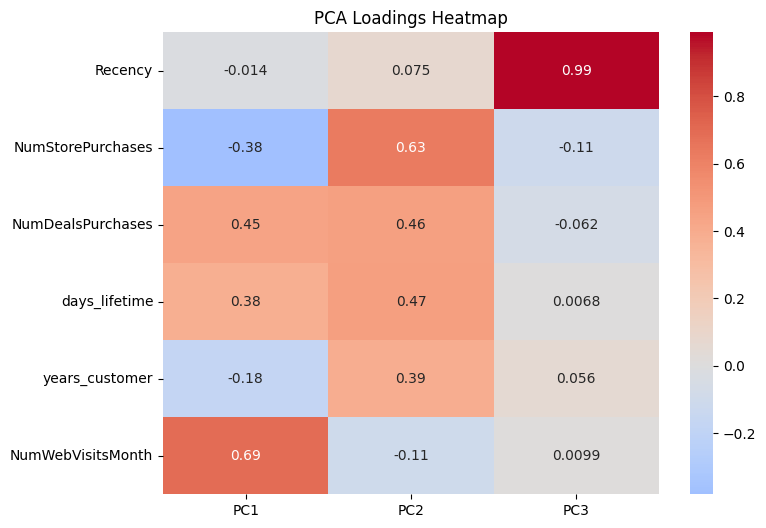

In [55]:
km_no_income = KMeans(n_clusters=3, n_init='auto', random_state=42)
X_scaled_no_income, scaler_no_income = scale_data(X, features_without_income)
df['cluster_no_income'] = km_no_income.fit_predict(X_scaled_no_income)
X_pca_no_income, pca_no_income = apply_pca(X_scaled_no_income, n_components=3)
plot_pca_clusters(X_pca_no_income, df['cluster_no_income'])
loadings_no_income = pd.DataFrame(
    pca_no_income.components_.T,
    index=features_without_income,
    columns=[f'PC{i+1}' for i in range(pca_no_income.n_components_)]
)
display(loadings_no_income)
plot_heatmap(loadings_no_income)

PC1 тепер описує тих, хто часто відвідує сайт, активно користується акціями, але рідше купує офлайн.

PC2 відображає довготривалу взаємодію з компанією, тобто клієнти, які вже давно користуються послугами, мають більше офлайн-покупок і активніше беруть участь у промоакціях.

PC3 практично повністю відображає давність останньої покупки.Вона чітко розділяє активних та неактивних клієнтів.

Отже, після видалення ключової фінансової ознаки Income головні компоненти змінили зміст. Таким чином, PCA виявляє інші осі варіацій — поведінкові та часові, замість фінансових.

### Завдання 5: Візуалізація кластеризації за допомогою t-SNE

Ваше завдання — використати метод t-SNE для візуалізації результатів кластеризації клієнтів у двовимірному просторі. Метод t-SNE допомагає знизити розмірність даних та зберегти локальні структури в даних, що робить його ефективним для візуалізації високорозмірних даних. Ми також зможемо порівняти результат цього методу з РСА.

1. Використайте метод t-SNE для зниження розмірності до 2х вимірів даних, які включають ознаки всі, що і в завданні 1, а також були відмасштабовані перед пониженням розмірностей.

2. Створіть новий DataFrame з координатами, отриманими після застосування t-SNE, та додайте до нього мітки кластерів.

3. Побудуйте інтерактивний 2D-графік розподілу клієнтів, де кольором буде позначено різні кластери і проаналізуйте графік з рекомендаціями нижче (можливо треба буде вивести додаткові візуалізації чи таблиці для інтерпретації, але треба прям зрозуміти, які ознаки формують який кластер і чим кластери відрізняються одне від одного).

  **Опишіть отримані кластери з точки зору ознак.**

4. Опишіть відмінність графіка tSNE від PCA.

#### ЯК можна інтерпретувати з t-SNE?

Хоча t-SNE не надає "компонентів" як РСА, він забезпечує низьковимірне представлення даних, яке можна візуально інтерпретувати:

- **Кластери:** t-SNE особливо добре показує кластери подібних точок. Якщо ви бачите чітко визначені кластери на графіку t-SNE, це свідчить про наявність груп схожих спостережень у ваших даних. Проаналізувати їх можемо, якщо додамо дані в `hover_data` або якщо якісь з даних виведемо як розмір чи форма точок на візуалізації. Також корисно може бути вивести середні значення ознак по кластерам.
- **Локальна структура:** Відносне розташування точок одного кластеру на графіку t-SNE може допомогти вам зрозуміти, які дані подібні між собою.
- **Глобальна структура:** Будьте обережні; t-SNE менш надійний для відображення глобальних структур (наприклад, відстаней між кластерами) у порівнянні з PCA, бо t-SNE націлений на збереження саме локальних структур.

In [61]:
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate='auto',
    init='pca',
    random_state=42
)

X_tsne = tsne.fit_transform(X_scaled)

df_tsne = df.copy()
df_tsne['TSNE1'] = X_tsne[:, 0]
df_tsne['TSNE2'] = X_tsne[:, 1]

fig = px.scatter(
    df_tsne,
    x='TSNE1',
    y='TSNE2',
    color=df['cluster'].astype(str),
    hover_data=[ 'Income',
    'Recency',
    'NumStorePurchases',
    'NumDealsPurchases',
    'days_lifetime',
    'years_customer',
    'NumWebVisitsMonth'],
    title='t-SNE Visualization of KMeans Clusters'
)
fig.show()

In [62]:
cluster_summary = (
    df.groupby('cluster')
      .agg({
          'Income':'mean',
          'Recency':'mean',
          'NumStorePurchases':'mean',
          'NumDealsPurchases':'mean',
          'days_lifetime':'mean',
          'years_customer':'mean',
          'NumWebVisitsMonth':'mean'
      })
      .round(1)
)
display(cluster_summary)

,Income,Recency,NumStorePurchases,NumDealsPurchases,days_lifetime,years_customer,NumWebVisitsMonth
cluster,,,,,,,
0,33061.0,48.5,3.2,1.8,312.3,41.9,6.5
1,72551.6,49.3,8.3,1.4,315.3,47.3,3.1
2,51937.7,50.0,6.7,5.0,510.0,48.2,6.9


### Кластер 0:

- Низький дохід (~33 000), невелика кількість офлайн-покупок (3.2).

- Висока частота відвідувань сайту (6.5) — переважає цифрова взаємодія.

- Активність середня (Recency ≈ 48), але схильність до акцій невелика (1.8).

Тип клієнта: “молоді, низький дохід, високий інтерес до онлайн покупок”.

На t-SNE видно як блок згруповано не надто щільно і його кандидати переплітаються з іншими кластерами, що може бути викидами

### Кластер 1:

 - Найвищий дохід (~72 000).

 - Найбільша кількість офлайн-покупок (8.3), мінімальна кількість веб-візитів (3.1).

 - Recency ≈ 49 — регулярна, але не щоденна активність.

 - Мало реагують на знижки (1.4) — нечутливі до промо.

Тип клієнта: “заможні, стабільні покупці, цінують якість, не знижки”.

На t-SNE ця група утворює компактний кластер (бірюзовий) праворуч — високий рівень подібності.

### Кластер 2:

 - Дохід середній (~52 000).

 - Багато знижкових покупок (5.0 — найбільше серед усіх).

 - Найдовший lifetime (510 днів) - давні клієнти.

 - Онлайн-активні (6.9 веб-візитів).

 - Recency ≈ 50 — стабільна регулярна взаємодія.

Тип клієнта: “лояльні, середній дохід, активно користуються акціями, онлайн і офлайн”.

На t-SNE (фіолетовий кластер) — теж добре виділяється, хоча трохи накладається на інші (бо поведінково ближчий до обох типів).
